<a href="https://colab.research.google.com/github/matthias-k/computational_physics_2024/blob/master/02_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron, MNIST
---
This notebook is adapted from an [introductory course of Udacity](https://github.com/udacity/deep-learning-v2-pytorch).

In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [44]:
# import libraries
# import matplotlib.pyplot as plt
import torch
import numpy as np

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [45]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32                                       # No improvements made

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

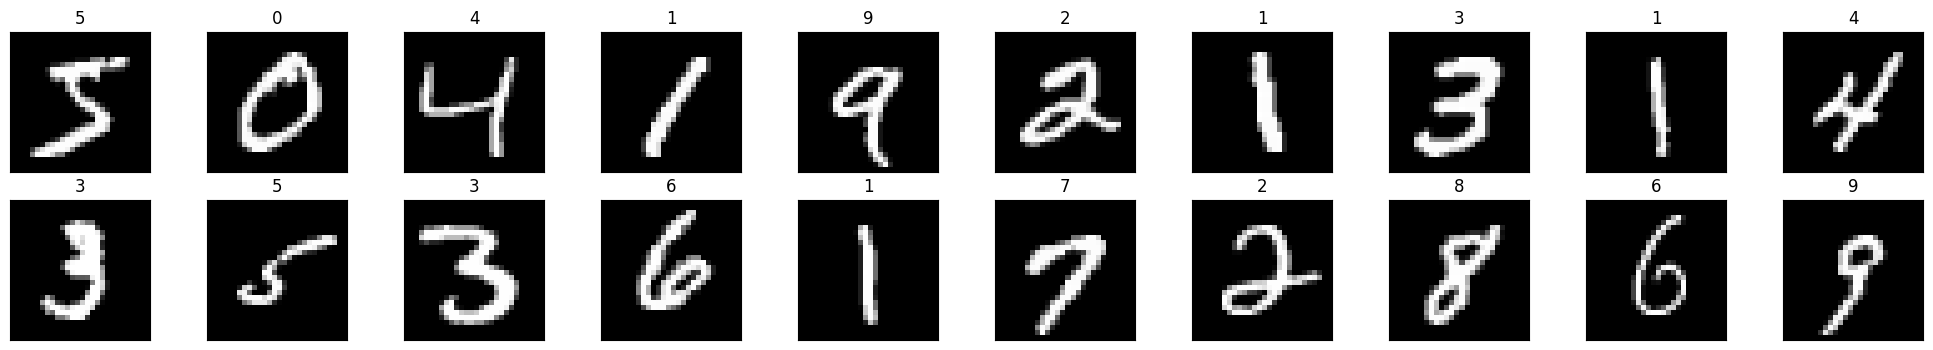

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 // 2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### View an Image in More Detail

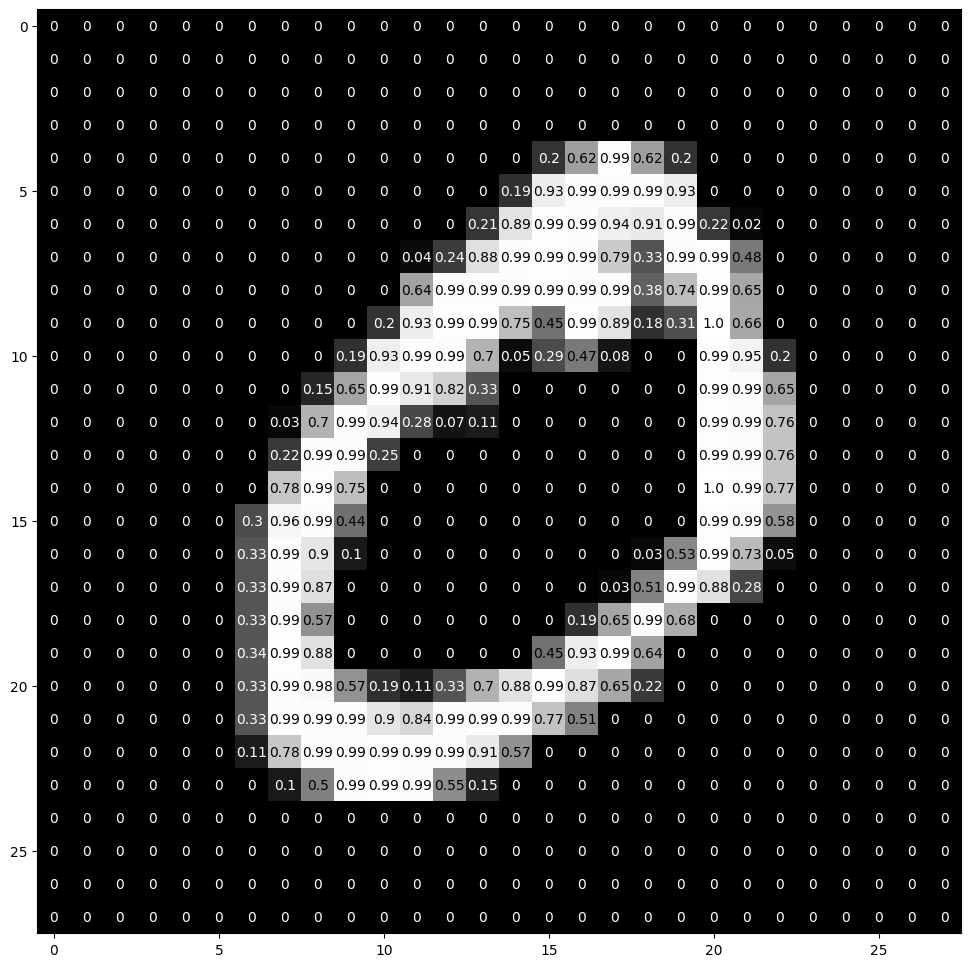

In [47]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
    
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [48]:

import torch.nn as nn
import torch.nn.functional as F

# original
# '''
class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 10 hidden node)
        
        self.fc1 = nn.Linear(28 * 28, 10)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

# initialize the NN
model = Net()
print(model)
# '''

# fully connected
'''
class Net(nn.Module):  
    def __init__(self):
        super(Net, self).__init__()
        # First fully connected layer (784 -> 256 hidden nodes)
        self.fc1 = nn.Linear(28 * 28, 256)
        # Second fully connected layer (256 -> 128 output classes)
        self.fc2 = nn.Linear(256, 128)
        # Third fully connected layer (128 -> 10 output classes)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Flatten the image
        x = x.view(-1, 28 * 28)
        # First layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Second layer (output layer, no activation)
        x = self.fc2(x)
        return x

# Initialize the model
model = Net()
print(model)
'''

# convolutional
'''
class CNN(nn.Module):  
    def __init__(self):
        super(CNN, self).__init__()
        
        # First convolutional layer: 1 input channel, 32 output filters, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        
        # Second convolutional layer: 32 input channels, 64 output filters, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Pooling layer: Reduces feature map size by half
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        # Apply first conv layer + ReLU + pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Apply second conv layer + ReLU + pooling
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 64 * 7 * 7)

        # Fully connected layers with ReLU and dropout
        x = self.dropout(F.relu(self.fc1(x)))  # 1
        x = self.fc2(x)  # 2 

        return x


model = CNN()
print(model)
'''


Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


'\nclass CNN(nn.Module):  \n    def __init__(self):\n        super(CNN, self).__init__()\n        \n        # First convolutional layer: 1 input channel, 32 output filters, 3x3 kernel\n        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)\n        \n        # Second convolutional layer: 32 input channels, 64 output filters, 3x3 kernel\n        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)\n        \n        # Pooling layer: Reduces feature map size by half\n        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)\n\n        # Fully connected layer\n        self.fc1 = nn.Linear(64 * 7 * 7, 128)\n        self.fc2 = nn.Linear(128, 10)\n\n        # Dropout for regularization\n        self.dropout = nn.Dropout(0.5) \n\n    def forward(self, x):\n        # Apply first conv layer + ReLU + pooling\n        x = self.pool(F.relu(self.conv1(x)))\n\n        # Apply second conv layer + ReLU + pooling\n        x = self.pool(F.re

### Exercise 2.2
I reduced the number of epochs to 20, in order to get a more manageable training time.
According to some online sources, torch is optimized for batch sizes in powers of 2. However, I was unable to improve performance through increasing the batch size. In fact it would even decrease slightly, but the accuracy would remain around 92% 
Adding 1 hidden layer with 128 hidden nodes improved the result and I tried to modify the batch size again with similar results. 
Adding a second hidden layer, with 256 -> 128 hidden nodes respectively, significantly improved accuracy up to 97% (9737/10000).
Next I tried incrementally changing the learning rate in steps of 0.005 until the accuracy plateaued at 97% (9777/10000) with lr=0.025 or 97% (9783/10000) lr=0.03

With these improved parameters, I increased the number of epochs to 35. Here the smaller learning rate performed slightly better with an accuracy of 98% (9803/10000) at lr=0.025
Although the others were roughly the same.

### Exercise 2.3
Moving on to a convolutional nn.
Using the model from the lecture as somewhat of a blueprint, except with a kernel size of 3, I added  2 convolutional layers, but with 32 and 64 output channels respectively. With max pooling after each convolutional layer and then a fully connected layer at the end.
This already reached an accuracy of 98% (9882/10000), but with a significantly longer training time (more than double).

I then tried to add another fc layer and drop out, which each improved accuracy and lastly I tried to modify batch size and learning rate just as before. This reached the best accuracy at 99% (9924/10000) for a learning rate of 0.025 and a batch size of 20.

I also noticed that I was able to reach a lower trainig loss using the fully connected model, despite the lower accuracy, which could be due to overfitting.

###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [49]:

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.025)        # lr=0.01

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data. 

In [50]:
# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))
    
    # Epoch: 20 	Training Loss: 0.293377 bei batch size 32   92% (9209/10000)
    # Epoch: 20 	Training Loss: 0.280138 bei batch size 20   92% (9223/10000)
    # Epoch: 20 	Training Loss: 0.082842 1 hidden layer, batch size 20
    # Epoch: 20 	Training Loss: 0.193348 1 hidden layer, batch size 64
    # Epoch: 20 	Training Loss: 0.120395 2 hidden layers, batch size 32   96%
    # Epoch: 20 	Training Loss: 0.081853 2 hidden layers, batch size 20   97% (9737/10000) lr=0.01
    # Epoch: 20 	Training Loss: 0.081853 2 hidden layers, batch size 20   97% (9775/10000) lr=0.02
    # Epoch: 20 	Training Loss: 0.055567 2 hidden layers, batch size 20   97% (9750/10000) lr=0.015
    # Epoch: 20 	Training Loss: 0.031694 2 hidden layers, batch size 20   97% (9777/10000) lr=0.025
    # Epoch: 20 	Training Loss: 0.025450 2 hidden layers, batch size 20   97% (9783/10000) lr=0.03
    # Epoch: 20 	Training Loss: 0.020641 2 hidden layers, batch size 20   lr=0.035

    # Epoch: 35 	Training Loss: 0.012833 2 hidden layers, batch size 20   98% (9803/10000) lr=0.025
    # Epoch: 35 	Training Loss: 0.008939 2 hidden layers, batch size 20   97% (9798/10000) lr=0.03
    # Epoch: 35 	Training Loss: 0.007121 2 hidden layers, batch size 20   97% (9796/10000) lr=0.035

# convolution
    # Epoch: 20 	Training Loss: 0.016360 2 conv, pool, 2 fc, drop out, bs 20, 99% (9908/10000) lr= 0.035 significantly longer train
    # Epoch: 20 	Training Loss: 0.010240 2 conv, pool, 1 fc, no drop out, bs 20, 98% (9882/10000)  lr= 0.025 significantly longer train

    # Epoch: 35 	Training Loss: 0.012104 2 conv, pool, 2 fc, drop out, bs 20, 99% (9924/10000) lr= 0.025 significantly longer train
    

Epoch: 1 	Training Loss: 0.853196
Epoch: 2 	Training Loss: 0.458981
Epoch: 3 	Training Loss: 0.403576
Epoch: 4 	Training Loss: 0.376409
Epoch: 5 	Training Loss: 0.359360
Epoch: 6 	Training Loss: 0.347336
Epoch: 7 	Training Loss: 0.338242
Epoch: 8 	Training Loss: 0.331023
Epoch: 9 	Training Loss: 0.325103
Epoch: 10 	Training Loss: 0.320132
Epoch: 11 	Training Loss: 0.315879
Epoch: 12 	Training Loss: 0.312175
Epoch: 13 	Training Loss: 0.308913
Epoch: 14 	Training Loss: 0.306011
Epoch: 15 	Training Loss: 0.303406
Epoch: 16 	Training Loss: 0.301049
Epoch: 17 	Training Loss: 0.298900
Epoch: 18 	Training Loss: 0.296930
Epoch: 19 	Training Loss: 0.295116
Epoch: 20 	Training Loss: 0.293434


---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

#### `model.eval()`

`model.eval(`) will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [51]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.285851

Test Accuracy of     0: 98% (963/980)
Test Accuracy of     1: 97% (1108/1135)
Test Accuracy of     2: 88% (911/1032)
Test Accuracy of     3: 90% (914/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 86% (774/892)
Test Accuracy of     6: 94% (910/958)
Test Accuracy of     7: 91% (941/1028)
Test Accuracy of     8: 89% (871/974)
Test Accuracy of     9: 89% (906/1009)

Test Accuracy (Overall): 92% (9209/10000)




```
# This is formatted as code
```

### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

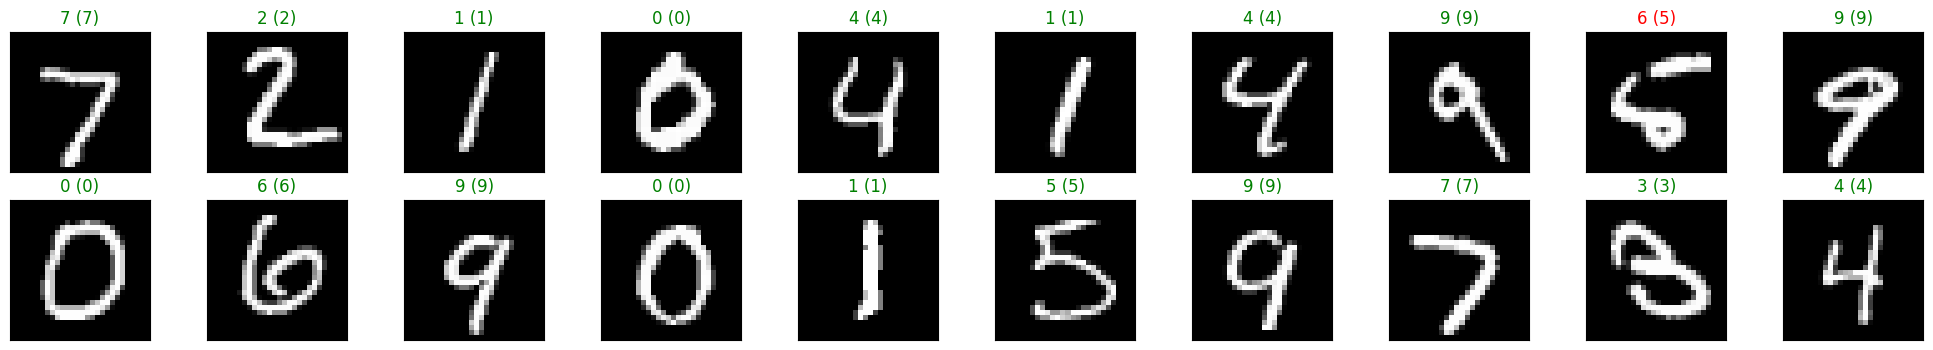

In [52]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

### Excercises

#### Excercise 2.1
Fill in all the blank spots to train a basic MLP on handwritten digit recognition. What result can you achieve?

#### Excercise 2.2
Adapt the network architecture, batch size and optimiser to increase accuracy. What is the best result you can achieve? Why do you think your changes improved the performance? What did you try what didnt work?

#### Excercise 2.3
Replace the fully connected layer with convolutional layers. How does the number of parameters change? Why do convolutional layers make sense for image data? Can you further increase model performance on handwritten digit recognition? Discuss again what you tried, what worked and what didn't work.



# Using GPUs

if you have a GPU available, you can move your model to the cpu with `model = model.cuda()`. You'll also have to move data to the GPU before processing it, e.g. by running

```
data = data.cuda()
target = target.cuda()
```

for getting data back to the CPU (which you have to do before you can convert it to numpy), use `.cpu()`. In practive this offen looks like
```
loss = loss.detach().cpu().numpy()
```